In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns; sns.set(color_codes=True)
from matplotlib.colors import ListedColormap
import networkx as nx
from numpy import nan
import math
import sys
import os

In [11]:
df = pd.read_pickle('df_ml_groups.pkl')

In [12]:
undirected = pd.read_pickle('undirected.pkl')

In [13]:
df = pd.concat([df, undirected], axis =1)

/Users/xingkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [14]:
df.dropna(axis=0, how='any',inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15217 entries, 000001-CN to ZYT-GB
Data columns (total 24 columns):
out_degree_centrality      15217 non-null float64
in_degree_centrality       15217 non-null float64
closeness_centrality       15217 non-null float64
betweenness_centrality     15217 non-null float64
eigenvector_centrality     15217 non-null float64
harmonic_centrality        15217 non-null float64
average_neighbor_degree    15217 non-null float64
square_clustering          15217 non-null float64
core_number                15217 non-null float64
pagerank                   15217 non-null float64
hubs                       15217 non-null float64
authorities                15217 non-null float64
out_degree2015             15217 non-null float64
in_degree2015              15217 non-null float64
out_degree2016             15217 non-null float64
in_degree2016              15217 non-null float64
diff_indegree              15217 non-null float64
diff_outdegree             15217 non-

In [16]:
features = ['out_degree_centrality', 'in_degree_centrality','closeness_centrality', 'betweenness_centrality', 'eigenvector_centrality','harmonic_centrality',
            'average_neighbor_degree','square_clustering','core_number','pagerank', 'hubs','authorities', 'out_degree2015', 'in_degree2015', 
            'node_clique_number','load_centrality','number_of_cliques','triangles','clustering']

In [17]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [18]:
X = df[features]
y = df['group']

In [19]:
X.corr()

,out_degree_centrality,in_degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,harmonic_centrality,average_neighbor_degree,square_clustering,core_number,pagerank,hubs,authorities,out_degree2015,in_degree2015,node_clique_number,load_centrality,number_of_cliques,triangles,clustering
out_degree_centrality,1.000000,0.470193,0.122569,0.632602,0.317430,0.131825,0.211466,0.012435,0.688883,0.320599,0.661263,0.405538,1.000000,0.470193,0.602866,0.670297,0.711285,0.676589,0.019812
in_degree_centrality,0.470193,1.000000,0.336613,0.704203,0.695206,0.354582,-0.005252,0.001667,0.464694,0.785807,0.148540,0.869260,0.470193,1.000000,0.429524,0.785750,0.851575,0.795874,-0.013841
closeness_centrality,0.122569,0.336613,1.000000,0.206194,0.411531,0.999525,-0.043840,-0.002691,0.406456,0.383140,0.047121,0.225429,0.122569,0.336613,0.362404,0.171925,0.211452,0.183326,0.108664
betweenness_centrality,0.632602,0.704203,0.206194,1.000000,0.513301,0.218575,0.049774,-0.000978,0.326773,0.624983,0.251788,0.541600,0.632602,0.704203,0.328942,0.878416,0.785865,0.750932,-0.017567
eigenvector_centrality,0.317430,0.695206,0.411531,0.513301,1.000000,0.433556,0.026731,-0.004186,0.482115,0.657513,0.111598,0.595501,0.317430,0.695206,0.487532,0.485287,0.585792,0.573923,0.073122
harmonic_centrality,0.131825,0.354582,0.999525,0.218575,0.433556,1.000000,-0.040848,-0.002472,0.419881,0.399388,0.050990,0.240674,0.131825,0.354582,0.375288,0.184603,0.226081,0.197132,0.109969
average_neighbor_degree,0.211466,-0.005252,-0.043840,0.049774,0.026731,-0.040848,1.000000,-0.011216,0.280416,-0.028358,0.338257,0.006988,0.211466,-0.005252,0.281170,0.027366,0.059301,0.064608,0.176880
square_clustering,0.012435,0.001667,-0.002691,-0.000978,-0.004186,-0.002472,-0.011216,1.000000,0.014304,0.002481,-0.007577,-0.001669,0.012435,0.001667,0.010606,0.006335,0.000317,-0.006149,0.015532
core_number,0.688883,0.464694,0.406456,0.326773,0.482115,0.419881,0.280416,0.014304,1.000000,0.398529,0.579467,0.352882,0.688883,0.464694,0.813869,0.358767,0.457406,0.398502,0.114465
pagerank,0.320599,0.785807,0.383140,0.624983,0.657513,0.399388,-0.028358,0.002481,0.398529,1.000000,0.080419,0.582926,0.320599,0.785807,0.376216,0.625674,0.620872,0.567725,0.006126


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)

In [23]:
X_test_scaled = scaler.transform(X_test)

# BernoulliNB

In [67]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled )
accuracy_score(y_test, pred)

0.5245729303547964

# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_scaled, y_train)
pred_knn = clf.predict(X_test_scaled )
accuracy_score(y_test, pred_knn)

0.5245729303547964

# OvO

In [71]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=0)) 
ovo_clf.fit(X_train_scaled, y_train)
pred_ovo = ovo_clf.predict(X_test_scaled)
accuracy_score(y_test, pred_ovo)

/Users/xingkong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/xingkong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/xin

0.5852825229960578

# GDBT

In [24]:
from  sklearn.ensemble  import  GradientBoostingClassifier
from sklearn.metrics import recall_score, accuracy_score

/Users/xingkong/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [25]:
model = GradientBoostingClassifier()
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [26]:
predicted_gdbt = model.predict(X_test_scaled )

In [27]:
accuracy_score(y_test, predicted_gdbt)

0.6099868593955322

# Gradient Boosting Regressor

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1

In [29]:
model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [30]:
predicted_gbr = model.predict(X_test_scaled)

In [31]:
mean_squared_error(y_test, predicted_gbr)

0.44643048517928785

In [32]:
predicted_gbr = [int(item>0.5) for  item in predicted_gbr]

In [33]:
accuracy_score(y_test, predicted_gbr)

0.5269382391590013

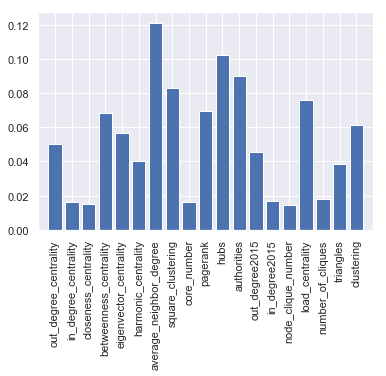

In [34]:
importance = model.feature_importances_

plt.figure()
plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), features, rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

# XGBoost

In [35]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [36]:
predicted_xgb = model.predict(X_test_scaled )

/Users/xingkong/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [37]:
accuracy_score(y_test, predicted_xgb)

0.6073587385019711

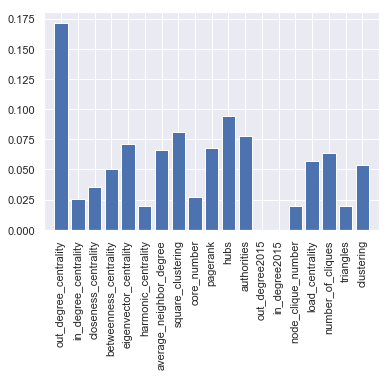

In [38]:
importance = model.feature_importances_

plt.figure()
plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), features, rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
#plt.show()
pylab.rcParams['figure.figsize'] = (8, 6)
pylab.savefig('feature_importances_in1.png', dpi=400, bbox_inches = 'tight')

In [39]:
mean_squared_error(y_test, predicted_xgb)

0.7387647831800263

## MLP Classifier

In [40]:
clf = MLPClassifier(hidden_layer_sizes = [50,50,50], alpha=0.0001, activation='relu',
                   random_state = 0, solver='sgd', verbose = 0)
clf.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[50, 50, 50], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

In [41]:
predicted = clf.predict(X_test_scaled)

In [42]:
from sklearn.metrics import recall_score, accuracy_score

In [43]:
accuracy_score(y_test, predicted)

0.5910643889618923

## SVM Classifier

In [44]:
svm = SVC().fit(X_train_scaled, y_train)
predicted_svm = svm.predict(X_test_scaled)

In [45]:
accuracy_score(y_test, predicted_svm)

0.5876478318002628

## LogisticRegression Classifier

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_reg = LogisticRegression().fit(X_train_scaled, y_train)
predicted_logreg = log_reg.predict(X_test_scaled)
accuracy_score(y_test, predicted_logreg)

0.5918528252299606

## SGD Classifier

In [48]:
from sklearn.linear_model import SGDClassifier

In [49]:
sgd_clf = SGDClassifier(penalty='l1').fit(X_train_scaled, y_train)
predicted_sgd = sgd_clf.predict(X_test_scaled)
accuracy_score(y_test, predicted_sgd)

/Users/xingkong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.5708278580814717

## DecisionTree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train_scaled, y_train)
predicted_tree = tree_clf.predict(X_test_scaled)
accuracy_score(y_test, predicted_tree)

0.5908015768725361

In [52]:
tree_clf.classes_

array([0., 1., 2.])

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_clf,X_train_scaled, y_train,
                        scoring = "accuracy", cv = 10)

In [54]:
print(scores)
print(scores.mean())
print(scores.std())

[0.56605424 0.57142857 0.58369851 0.60035057 0.58106924 0.57318142
 0.58194566 0.56967572 0.5687993  0.57318142]
0.5769384655138966
0.009654064373723114


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted_tree)

array([[   0,  359,  304],
       [   0, 1883,  121],
       [   0,  773,  365]])

In [56]:
from sklearn.tree import export_graphviz
from sklearn import tree

In [57]:
from IPython.display import Image  

In [58]:
import graphviz
import pydotplus

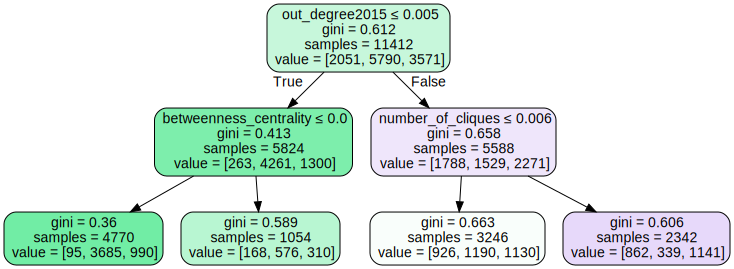

In [59]:
dot_data = tree.export_graphviz(tree_clf, out_file=None, feature_names=features,filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [60]:
# graph = pydotplus.graph_from_dot_data(dot_data)  
# img = Image(graph.create_png())  
# graph.write_png("out.png")  

## RandomForest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = [
    {'max_features':[2,4,6,8]}
]

classifer = RandomForestClassifier()
grid_search = GridSearchCV(classifer, param_grid, cv = 5,
                          scoring = 'accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [63]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
clf_forest = RandomForestClassifier(max_depth=None, max_features= 4, random_state=0)

In [65]:
clf_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [66]:
predicted_forest = clf_forest.predict(X_test_scaled)
accuracy_score(y_test, predicted_forest)

0.5550591327201051

In [106]:
from sklearn.metrics import roc_curve

In [107]:
#fpr, tpr, thresholds = roc_curve(y_test, predicted_tree)

In [108]:
# fpr, tpr, thresholds = roc_curve(y_test, predicted_forest)
# def plot_roc_curve(fpr,tpr, label=None):
#     plt.plot(fpr,tpr,linewidth=2, label=label)
#     plt.plot([0,1],[0,1], 'k--')
#     plt.axis([0,1,0,1])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
# plot_roc_curve(fpr,tpr)
# pylab.rcParams['figure.figsize'] = (8, 8)
# pylab.savefig('Roc_dt.png', dpi=400, bbox_inches = 'tight')